In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scanpy as sc
import squidpy as sq
import importlib as imp
import seaborn as sns
import spotiphy
import pickle

In [2]:
results_folder = 'results/Xenium/'
adata_xe = sc.read_h5ad('F:/Ziqian Zheng/Spatial omics/Xenium/B1/adata_xe.h5ad')
nucleus_centers = adata_xe.obs[['x_centroid', 'y_centroid']].values
cell_type = list(adata_xe.obs['cell_type'])
Xenium_img = np.load(results_folder+'Xenium_resize_Affine.npy')
threshold = 1500
Xenium_img[Xenium_img>threshold] = threshold
Xenium_img = np.clip(Xenium_img * (255 / threshold), 0, 255).astype(np.uint8)
Xenium_background = cv.cvtColor(Xenium_img, cv.COLOR_GRAY2RGB)
with open(results_folder+"type_list.txt", "r") as file:
    type_list = [line.strip() for line in file.readlines()]
theta = 3.39
trans = [7100, 10000]
M = np.float32([[np.cos(theta), -np.sin(theta), trans[0]], [np.sin(theta), np.cos(theta), trans[1]]])

In [3]:
cell_boundaries = pd.read_csv('F:/Ziqian Zheng/Spatial omics/Xenium/B1/cell_boundaries.csv')
cell_boundaries_coordinate = cell_boundaries[['vertex_x', 'vertex_y']].values
cell_boundaries_coordinate = cell_boundaries_coordinate/np.array([[0.7528, 0.7528/0.86]])
cell_boundaries_coordinate = cell_boundaries_coordinate @ M[:, :2].T + trans
cell_boundaries[['vertex_x', 'vertex_y']] = cell_boundaries_coordinate
nucleus_boundaries = pd.read_csv('F:/Ziqian Zheng/Spatial omics/Xenium/B1/nucleus_boundaries.csv')
nucleus_boundaries_coordinate = nucleus_boundaries[['vertex_x', 'vertex_y']].values
nucleus_boundaries_coordinate = nucleus_boundaries_coordinate/np.array([[0.7528, 0.7528/0.86]])
nucleus_boundaries_coordinate = nucleus_boundaries_coordinate @ M[:, :2].T + trans
nucleus_boundaries[['vertex_x', 'vertex_y']] = nucleus_boundaries_coordinate

In [24]:
imp.reload(spotiphy.plot)

<module 'spotiphy.plot' from 'C:\\Users\\zzheng92\\Desktop\\Spotiphy\\spotiphy\\plot.py'>

In [25]:
plot_xenium = spotiphy.plot.Plot_Xenium(Xenium_background, cell_boundaries, nucleus_boundaries, type_list, cell_type, nucleus_centers)

100%|██████████| 104831/104831 [00:00<00:00, 189450.12it/s]


Adding nuclei.


104831it [00:00, 130817.55it/s]
104831it [00:01, 84161.16it/s]


Saving the image.


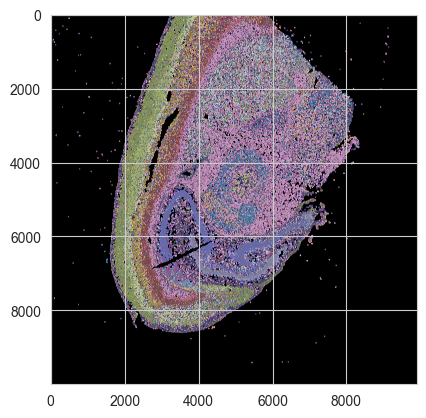

In [26]:
plot_xenium.plot(save=results_folder+'Xenium_plot.png', cell=True, cell_boundaries=True, cell_boundary_color=(100, 100, 100), 
                 cell_boundary_thickness=2)

In [75]:
# cell_boundaries_temp = plot_xenium.cell_boundaries
idx_temp = plot_xenium.idx
idx_temp[: 10]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
 [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38],
 [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51],
 [52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
 [65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
 [78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
 [91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103],
 [104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116],
 [117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]]